In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
import numpy as np
import scipy as sp

In [2]:
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'Malgun Gothic')
%matplotlib inline

In [3]:
df_old = pd.read_csv('C:/datafile/체감온도노인_final.csv', encoding = 'cp949')
df_young = pd.read_csv('C:/datafile/체감온도어린이_final.csv', encoding = 'cp949')
df_land_price = pd.read_csv('C:/datafile/공시지가_final.csv', encoding = 'cp949')
df_pop_den = pd.read_csv('C:/datafile/인구_인구밀도_final.csv', encoding = 'cp949')

In [4]:
df_land_price = df_land_price.iloc[:,:2]
df_old = df_old[['지점','노인평균']]
df_young = df_young[['지점', '어린이평균']]

In [5]:
df_oy = df_old.copy()
df_oy['어린이평균'] = df_young['어린이평균']

In [6]:
df_oy['체감온도점수'] = df_pop_den['노인인구밀도']*df_oy['노인평균'] + df_pop_den['어린이인구밀도']*df_oy['어린이평균']
df_oy

,지점,노인평균,어린이평균,체감온도점수
0,가락1동,27.101474,27.858092,122782.370053
1,가락2동,27.101474,27.858092,213562.891995
2,가락본동,27.101474,27.858092,127199.759831
3,가리봉동,26.957314,27.689463,174361.047225
4,가산동,26.959730,27.689463,35571.880563
...,...,...,...,...
420,효창동,26.868131,27.596769,134940.548993
421,후암동,26.865716,27.596769,133973.064733
422,휘경1동,26.836730,27.563934,120704.015806
423,휘경2동,26.836730,27.563934,144742.489726


In [7]:
robust = RobustScaler()

<AxesSubplot:>

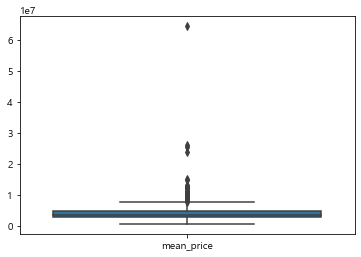

In [134]:
sns.boxplot(data = df_land_price)

<AxesSubplot:ylabel='Count'>

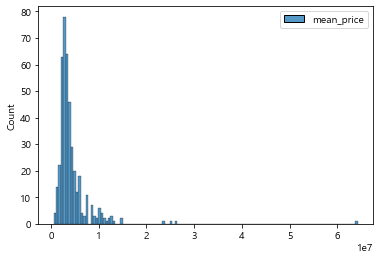

In [170]:
sns.histplot(df_land_price[['mean_price']])

<AxesSubplot:ylabel='Count'>

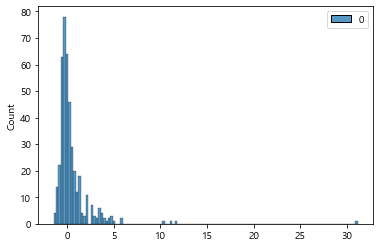

In [135]:
sns.histplot(robust.fit_transform(df_land_price[['mean_price']]))

In [169]:
pd.DataFrame(robust.fit_transform(df_land_price[['mean_price']])).skew()

0    8.326847
dtype: float64

c:\users\horya\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='체감온도점수'>

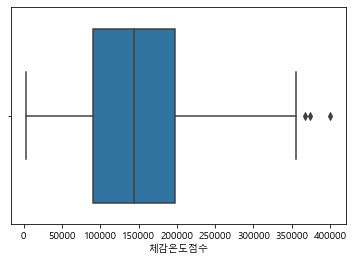

In [136]:
sns.boxplot(df_oy['체감온도점수'])

c:\users\horya\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_price'>

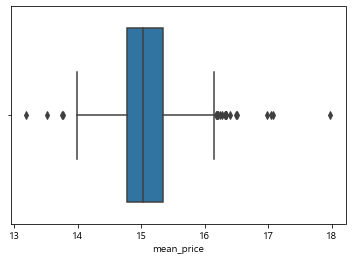

In [137]:
sns.boxplot(np.log(df_land_price['mean_price']))

<AxesSubplot:xlabel='mean_price', ylabel='Count'>

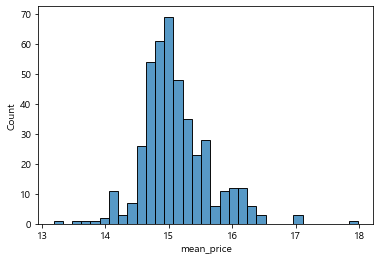

In [138]:
sns.histplot(np.log(df_land_price['mean_price']))

<AxesSubplot:ylabel='Count'>

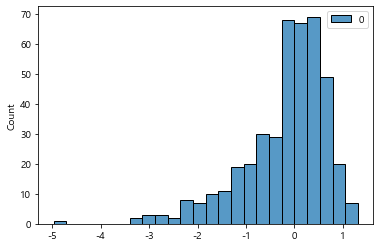

In [9]:
sns.histplot(robust.fit_transform(np.log(df_oy[['체감온도점수']])))

<AxesSubplot:ylabel='Count'>

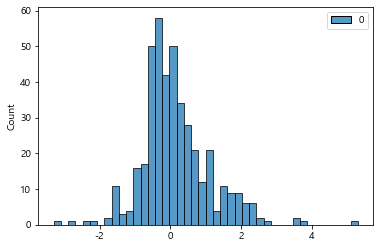

In [140]:
sns.histplot(robust.fit_transform(np.log(df_land_price[['mean_price']])),bins = 42)

In [172]:
df_oy['폭염위험도점수5'] = robust.fit_transform(df_oy[['체감온도점수']]) - robust.fit_transform((df_land_price[['mean_price']]))


In [181]:
df_oy['폭염위험도점수5'] = df_oy['폭염위험도점수5'] + np.abs(df_oy['폭염위험도점수5'].min())

In [141]:
df_oy['공시지가_log'] = np.log(df_land_price['mean_price'])

df_oy['폭염위험도점수'] = robust.fit_transform(df_oy[['체감온도점수']]) - robust.fit_transform(np.log(df_land_price[['mean_price']]))

df_oy['폭염위험도점수2'] = 2*robust.fit_transform(df_oy[['체감온도점수']]) - robust.fit_transform(np.log(df_land_price[['mean_price']]))

df_oy['폭염위험도점수3'] = 3*robust.fit_transform(df_oy[['체감온도점수']]) - robust.fit_transform(np.log(df_land_price[['mean_price']]))

df_oy['폭염위험도점수4'] = 4*robust.fit_transform(df_oy[['체감온도점수']]) - robust.fit_transform(np.log(df_land_price[['mean_price']]))



In [182]:
df_oy.to_csv('C:/datafile/폭염위험도점수.csv', encoding = 'utf-8-sig')

In [142]:
df_oy.sort_values(by = '폭염위험도점수', ascending = False).head(10)

,지점,노인평균,어린이평균,체감온도점수,공시지가_log,폭염위험도점수,폭염위험도점수2,폭염위험도점수3,폭염위험도점수4
176,상계5동,26.832918,27.579752,400218.794683,14.743140,2.894454,5.289395,7.684336,10.079276
89,돈암2동,26.709466,27.482488,348088.953862,14.492422,2.856269,4.762971,6.669672,8.576373
251,신월4동,26.940137,27.721478,256560.555644,14.184671,2.551461,3.600922,4.650384,5.699845
395,하계2동,27.082012,27.807367,295543.577132,14.415551,2.502126,3.916696,5.331266,6.745835
164,삼각산동,27.065104,27.782609,367318.170949,14.803652,2.477691,4.564489,6.651288,8.738087
249,신월2동,26.940137,27.721478,244302.690437,14.184671,2.436656,3.371312,4.305968,5.240625
356,중계1동,26.474049,27.207484,292345.653401,14.508347,2.305601,3.690220,5.074839,6.459458
357,중계2·3동,26.474049,27.207484,290405.721913,14.508347,2.287432,3.653882,5.020332,6.386781
82,도봉2동,26.863413,27.610583,260213.808931,14.363852,2.264036,3.347713,4.431390,5.515068
277,여의동,26.986941,27.718146,30768.085017,13.182337,2.235976,1.170703,0.105429,-0.959844


In [143]:
df_oy.sort_values(by = '폭염위험도점수2', ascending = False).head(10)

,지점,노인평균,어린이평균,체감온도점수,공시지가_log,폭염위험도점수,폭염위험도점수2,폭염위험도점수3,폭염위험도점수4
176,상계5동,26.832918,27.579752,400218.794683,14.743140,2.894454,5.289395,7.684336,10.079276
89,돈암2동,26.709466,27.482488,348088.953862,14.492422,2.856269,4.762971,6.669672,8.576373
164,삼각산동,27.065104,27.782609,367318.170949,14.803652,2.477691,4.564489,6.651288,8.738087
401,행당2동,27.013511,27.705314,373564.122853,15.139704,1.932955,4.078252,6.223549,8.368847
395,하계2동,27.082012,27.807367,295543.577132,14.415551,2.502126,3.916696,5.331266,6.745835
386,청림동,27.002255,27.694577,355040.245012,15.061818,1.899273,3.871079,5.842885,7.814691
36,구로4동,26.959247,27.678351,333894.257447,14.866433,2.051952,3.825708,5.599464,7.373220
356,중계1동,26.474049,27.207484,292345.653401,14.508347,2.305601,3.690220,5.074839,6.459458
357,중계2·3동,26.474049,27.207484,290405.721913,14.508347,2.287432,3.653882,5.020332,6.386781
139,방학1동,26.833623,27.673787,297545.520042,14.602859,2.184648,3.617968,5.051287,6.484607


In [144]:
df_oy.sort_values(by = '폭염위험도점수3', ascending = False).head(10)

,지점,노인평균,어린이평균,체감온도점수,공시지가_log,폭염위험도점수,폭염위험도점수2,폭염위험도점수3,폭염위험도점수4
176,상계5동,26.832918,27.579752,400218.794683,14.743140,2.894454,5.289395,7.684336,10.079276
89,돈암2동,26.709466,27.482488,348088.953862,14.492422,2.856269,4.762971,6.669672,8.576373
164,삼각산동,27.065104,27.782609,367318.170949,14.803652,2.477691,4.564489,6.651288,8.738087
401,행당2동,27.013511,27.705314,373564.122853,15.139704,1.932955,4.078252,6.223549,8.368847
386,청림동,27.002255,27.694577,355040.245012,15.061818,1.899273,3.871079,5.842885,7.814691
36,구로4동,26.959247,27.678351,333894.257447,14.866433,2.051952,3.825708,5.599464,7.373220
395,하계2동,27.082012,27.807367,295543.577132,14.415551,2.502126,3.916696,5.331266,6.745835
47,길음1동,26.975978,27.692293,340851.045525,15.256334,1.417212,3.256124,5.095036,6.933949
356,중계1동,26.474049,27.207484,292345.653401,14.508347,2.305601,3.690220,5.074839,6.459458
139,방학1동,26.833623,27.673787,297545.520042,14.602859,2.184648,3.617968,5.051287,6.484607


In [145]:
df_oy.sort_values(by = '폭염위험도점수4', ascending = False).head(10)

,지점,노인평균,어린이평균,체감온도점수,공시지가_log,폭염위험도점수,폭염위험도점수2,폭염위험도점수3,폭염위험도점수4
176,상계5동,26.832918,27.579752,400218.794683,14.743140,2.894454,5.289395,7.684336,10.079276
164,삼각산동,27.065104,27.782609,367318.170949,14.803652,2.477691,4.564489,6.651288,8.738087
89,돈암2동,26.709466,27.482488,348088.953862,14.492422,2.856269,4.762971,6.669672,8.576373
401,행당2동,27.013511,27.705314,373564.122853,15.139704,1.932955,4.078252,6.223549,8.368847
386,청림동,27.002255,27.694577,355040.245012,15.061818,1.899273,3.871079,5.842885,7.814691
36,구로4동,26.959247,27.678351,333894.257447,14.866433,2.051952,3.825708,5.599464,7.373220
47,길음1동,26.975978,27.692293,340851.045525,15.256334,1.417212,3.256124,5.095036,6.933949
395,하계2동,27.082012,27.807367,295543.577132,14.415551,2.502126,3.916696,5.331266,6.745835
209,성현동,27.002255,27.694577,320258.587606,15.061818,1.573514,3.219560,4.865607,6.511654
139,방학1동,26.833623,27.673787,297545.520042,14.602859,2.184648,3.617968,5.051287,6.484607


In [125]:
np.abs(df_oy['폭염위험도점수'].min())

7.692488887455571

In [146]:
df_oy['폭염위험도점수'] = df_oy['폭염위험도점수'] + np.abs(df_oy['폭염위험도점수'].min())
df_oy['폭염위험도점수2'] = df_oy['폭염위험도점수2'] + np.abs(df_oy['폭염위험도점수2'].min())
df_oy['폭염위험도점수3'] = df_oy['폭염위험도점수3'] + np.abs(df_oy['폭염위험도점수3'].min())
df_oy['폭염위험도점수4'] = df_oy['폭염위험도점수4'] + np.abs(df_oy['폭염위험도점수4'].min())

In [147]:
df_oy.sort_values(by = '폭염위험도점수')

,지점,노인평균,어린이평균,체감온도점수,공시지가_log,폭염위험도점수,폭염위험도점수2,폭염위험도점수3,폭염위험도점수4
110,명동,26.537515,27.359979,25412.238252,17.978854,0.000000,0.000000,0.000000,0.000000
353,종로1·2·3·4가동,26.604544,27.304423,25747.092808,17.075097,1.625434,1.628570,1.631706,1.634843
211,소공동,26.646211,27.443312,16315.198083,16.983614,1.701315,1.616113,1.530912,1.445711
389,충현동,26.649079,27.383077,114298.932190,17.043753,2.511059,3.343558,4.176056,5.008554
310,을지로동,26.653457,27.304423,25551.636226,16.514337,2.630202,2.631508,2.632813,2.634119
...,...,...,...,...,...,...,...,...,...
164,삼각산동,27.065104,27.782609,367318.170949,14.803652,8.901913,12.104148,15.306382,18.508616
395,하계2동,27.082012,27.807367,295543.577132,14.415551,8.926348,11.456354,13.986359,16.516364
251,신월4동,26.940137,27.721478,256560.555644,14.184671,8.975684,11.140580,13.305477,15.470374
89,돈암2동,26.709466,27.482488,348088.953862,14.492422,9.280492,12.302629,15.324765,18.346902


In [180]:
df_oy.sort_values(by = '공시지가_log', ascending = False)

,지점,노인평균,어린이평균,체감온도점수,공시지가_log,폭염위험도점수,폭염위험도점수2,폭염위험도점수3,폭염위험도점수4,폭염위험도점수5
110,명동,26.537515,27.359979,25412.238252,17.978854,0.000000,0.000000,0.000000,0.000000,-32.268461
353,종로1·2·3·4가동,26.604544,27.304423,25747.092808,17.075097,1.625434,1.628570,1.631706,1.634843,-12.715013
389,충현동,26.649079,27.383077,114298.932190,17.043753,2.511059,3.343558,4.176056,5.008554,-11.474942
211,소공동,26.646211,27.443312,16315.198083,16.983614,1.701315,1.616113,1.530912,1.445711,-11.639756
310,을지로동,26.653457,27.304423,25551.636226,16.514337,2.630202,2.631508,2.632813,2.634119,-7.003920
...,...,...,...,...,...,...,...,...,...,...
294,용강동,26.904816,27.718146,180910.307233,13.986020,8.623747,10.080116,11.536485,12.992854,1.441890
369,진관동,26.681726,27.431612,35833.684023,13.765200,7.661369,7.758975,7.856580,7.954186,0.203235
56,내곡동,27.154438,27.843825,11225.134571,13.751172,7.456071,7.323197,7.190323,7.057448,-0.020474
12,강일동,26.783628,27.520305,93465.946624,13.512723,8.654355,9.291734,9.929114,10.566494,0.851465
